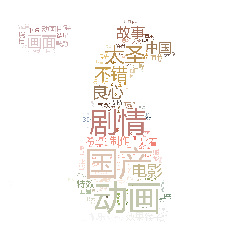

In [53]:
from wordcloud import WordCloud

from wordcloud import STOPWORDS

import matplotlib.pyplot as plt

from wordcloud import ImageColorGenerator

import numpy as np

import pandas as pd

import jieba

pd.set_option('display.max_rows',50)

pd.set_option('display.max_columns',10)

pd.set_option('display.precision',4)





df = pd.read_excel('大圣归来-电影评分与评论.xlsx')    # 读入评论
allcomments = ' '.join(df['Comment'])    # 拼接评论
words = jieba.lcut(allcomments[:len(allcomments)//3])    # 分词
words_series = pd.Series(words)    # 转换为Series
word_freq = words_series.value_counts()    #统计词频
sw = open('stopwords.txt',encoding='utf-8').read()    #读入停用词文本
swlist = sw[1:].split()    #切分停用词
word_freq = word_freq[~word_freq.index.isin(swlist)]   # 过滤停用词
word_freq = word_freq[word_freq.index.str.len() > 1]   # 过滤单字
my_sw_list = ['真的','感觉','之作','一部','确实','这部','片子']    # 自定义字典
word_freq = word_freq[~word_freq.index.isin(my_sw_list)]    # 过滤自定义字典
# content = open('RomeoandJuliet.txt').read()
# sws = STOPWORDS
# sws.update(['thy','thee','come','go','o','will','thou'])
backpic =  plt.imread('大圣归来-背景图.jpg')    # 读入背景图
myfont = 'c:/Windows/Fonts/msyh.ttc'# 设置中文字体
mycloud = WordCloud(background_color='white',    #设置背景颜色
                    colormap='PuBu_r',    # 设置配色方案
                    width=1280,height=720,    # 设置图片尺寸
                    mask=backpic,    
                    font_path=myfont,
                    scale=8
                   ).generate_from_frequencies(word_freq.to_dict())

image_colors = ImageColorGenerator(backpic)
mycloud.recolor(color_func = image_colors)
plt.axis('off')
plt.imshow(mycloud);
mycloud.to_file('大圣归来_CYT.png')
